# Równania Lotki-Volterry

## Tu będzie wstęp bla bla bla

## Rozwiązanie numeryczne za pomocą metody Euler'a

Aby rozwiązać nasze równanie numerycznie, zmieńmy nieco sposób, w jaki na nie patrzymy.

\begin{equation*}
    \begin{split}
        \frac{\mathbb{d}x}{\mathbb{d}t}&=a \,x-b \,xy \\
        \frac{\mathbb{d}y}{\mathbb{d}t}&=d \,xy-c\,y
    \end{split}
\end{equation*}

\begin{equation*}
    \begin{split}
        \frac{\Delta x}{\Delta t}&=a \,x-b \,xy \\
        \frac{\Delta y}{\Delta t}&=d \,xy-c\,y
    \end{split}
\end{equation*}

Stosując taki zapis chcemy podkreślić, że aby rozwiązać układ numerycznie, będziemy wielokrotnie wyliczać jego wartości dla dyskretnych czasów.

Następnie wymnażamy obie strony równania przez $\Delta t$, co pozwoli nam przystąpić do implementacji funkcji w pythonie.

\begin{equation*}
    \begin{split}
        \Delta x&=(a \,x-b \,xy) \Delta t \\
        \Delta y&=(d \,xy-c\,y) \Delta t
    \end{split}
\end{equation*}

100
100 100
[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5
 14.  14.5 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5 20.  20.5
 21.  21.5 22.  22.5 23.  23.5 24.  24.5 25.  25.5 26.  26.5 27.  27.5
 28.  28.5 29.  29.5 30.  30.5 31.  31.5 32.  32.5 33.  33.5 34.  34.5
 35.  35.5 36.  36.5 37.  37.5 38.  38.5 39.  39.5 40.  40.5 41.  41.5
 42.  42.5 43.  43.5 44.  44.5 45.  45.5 46.  46.5 47.  47.5 48.  48.5
 49.  49.5]


AttributeError: 'list' object has no attribute 'get_label'

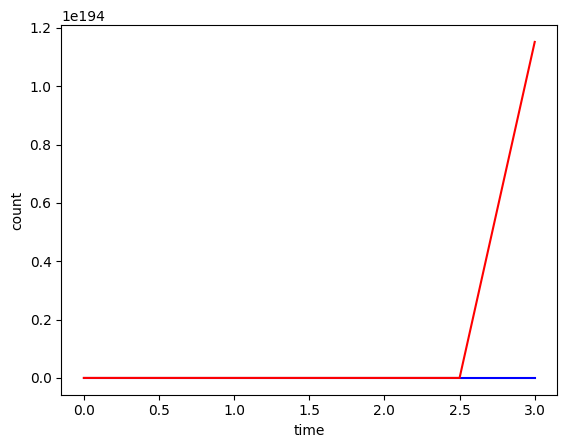

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def predator_prey_simple_euler(x_0, y_0, a, b, d, c, t_end, delta_t):
    x = [x_0]
    y = [y_0]
    t = np.arange(0, t_end, delta_t)

    for _ in range(len(t)-1):
        next_x = x[-1] + (a*x[-1] - b*x[-1]*y[-1])*delta_t #aktualne x + delta x
        x.append(next_x)

        next_y = y[-1] + (d*x[-1]*y[-1] - c*y[-1])*delta_t #aktualne y + delta y
        y.append(next_y)

    print(len(t))
    print(len(x), len(y))
    print(t)
    #rysowanie wykresu
    f, ax = plt.subplots(1)

    fig1 = ax.plot(t, x, color="b", label="prey")
    fig2 = ax.plot(t, y, color="r", label="predator")

    ax.set_ylabel("count")
    ax.set_xlabel("time")
    ax.legend(handles=[fig1, fig2])
    plt.show()

predator_prey_simple_euler(20, 20, 1.1, 0.4, 0.4, 0.1, 50, 0.5)
        
